# Project Demo: The Squirrel Census

#### Abigail Grunenberg: 11547874 

### Overview: 
- Dataset: The Squirrel Census https://www.thesquirrelcensus.com/
    - Data collected on the all of the squirrels seen in New York City Parks in 2018
    - Has information on the colour, age, the exact location, and several other interesting notes or attributes taken by the observer  
- Interesting parts of the data set:
    - Unique / Niche
    - Curious as to how they were able to track thousands of squirrels
    - Data was collected rigousily and accuractely
        - hundreds of observers
- Problem: 
    - So many squirrels in the data set (3023)
    - impossible to decifer anything about the squirrels
    - Code compacts and visualizes the percent of squirrels seen in the morning (AM) and in the evening (PM)


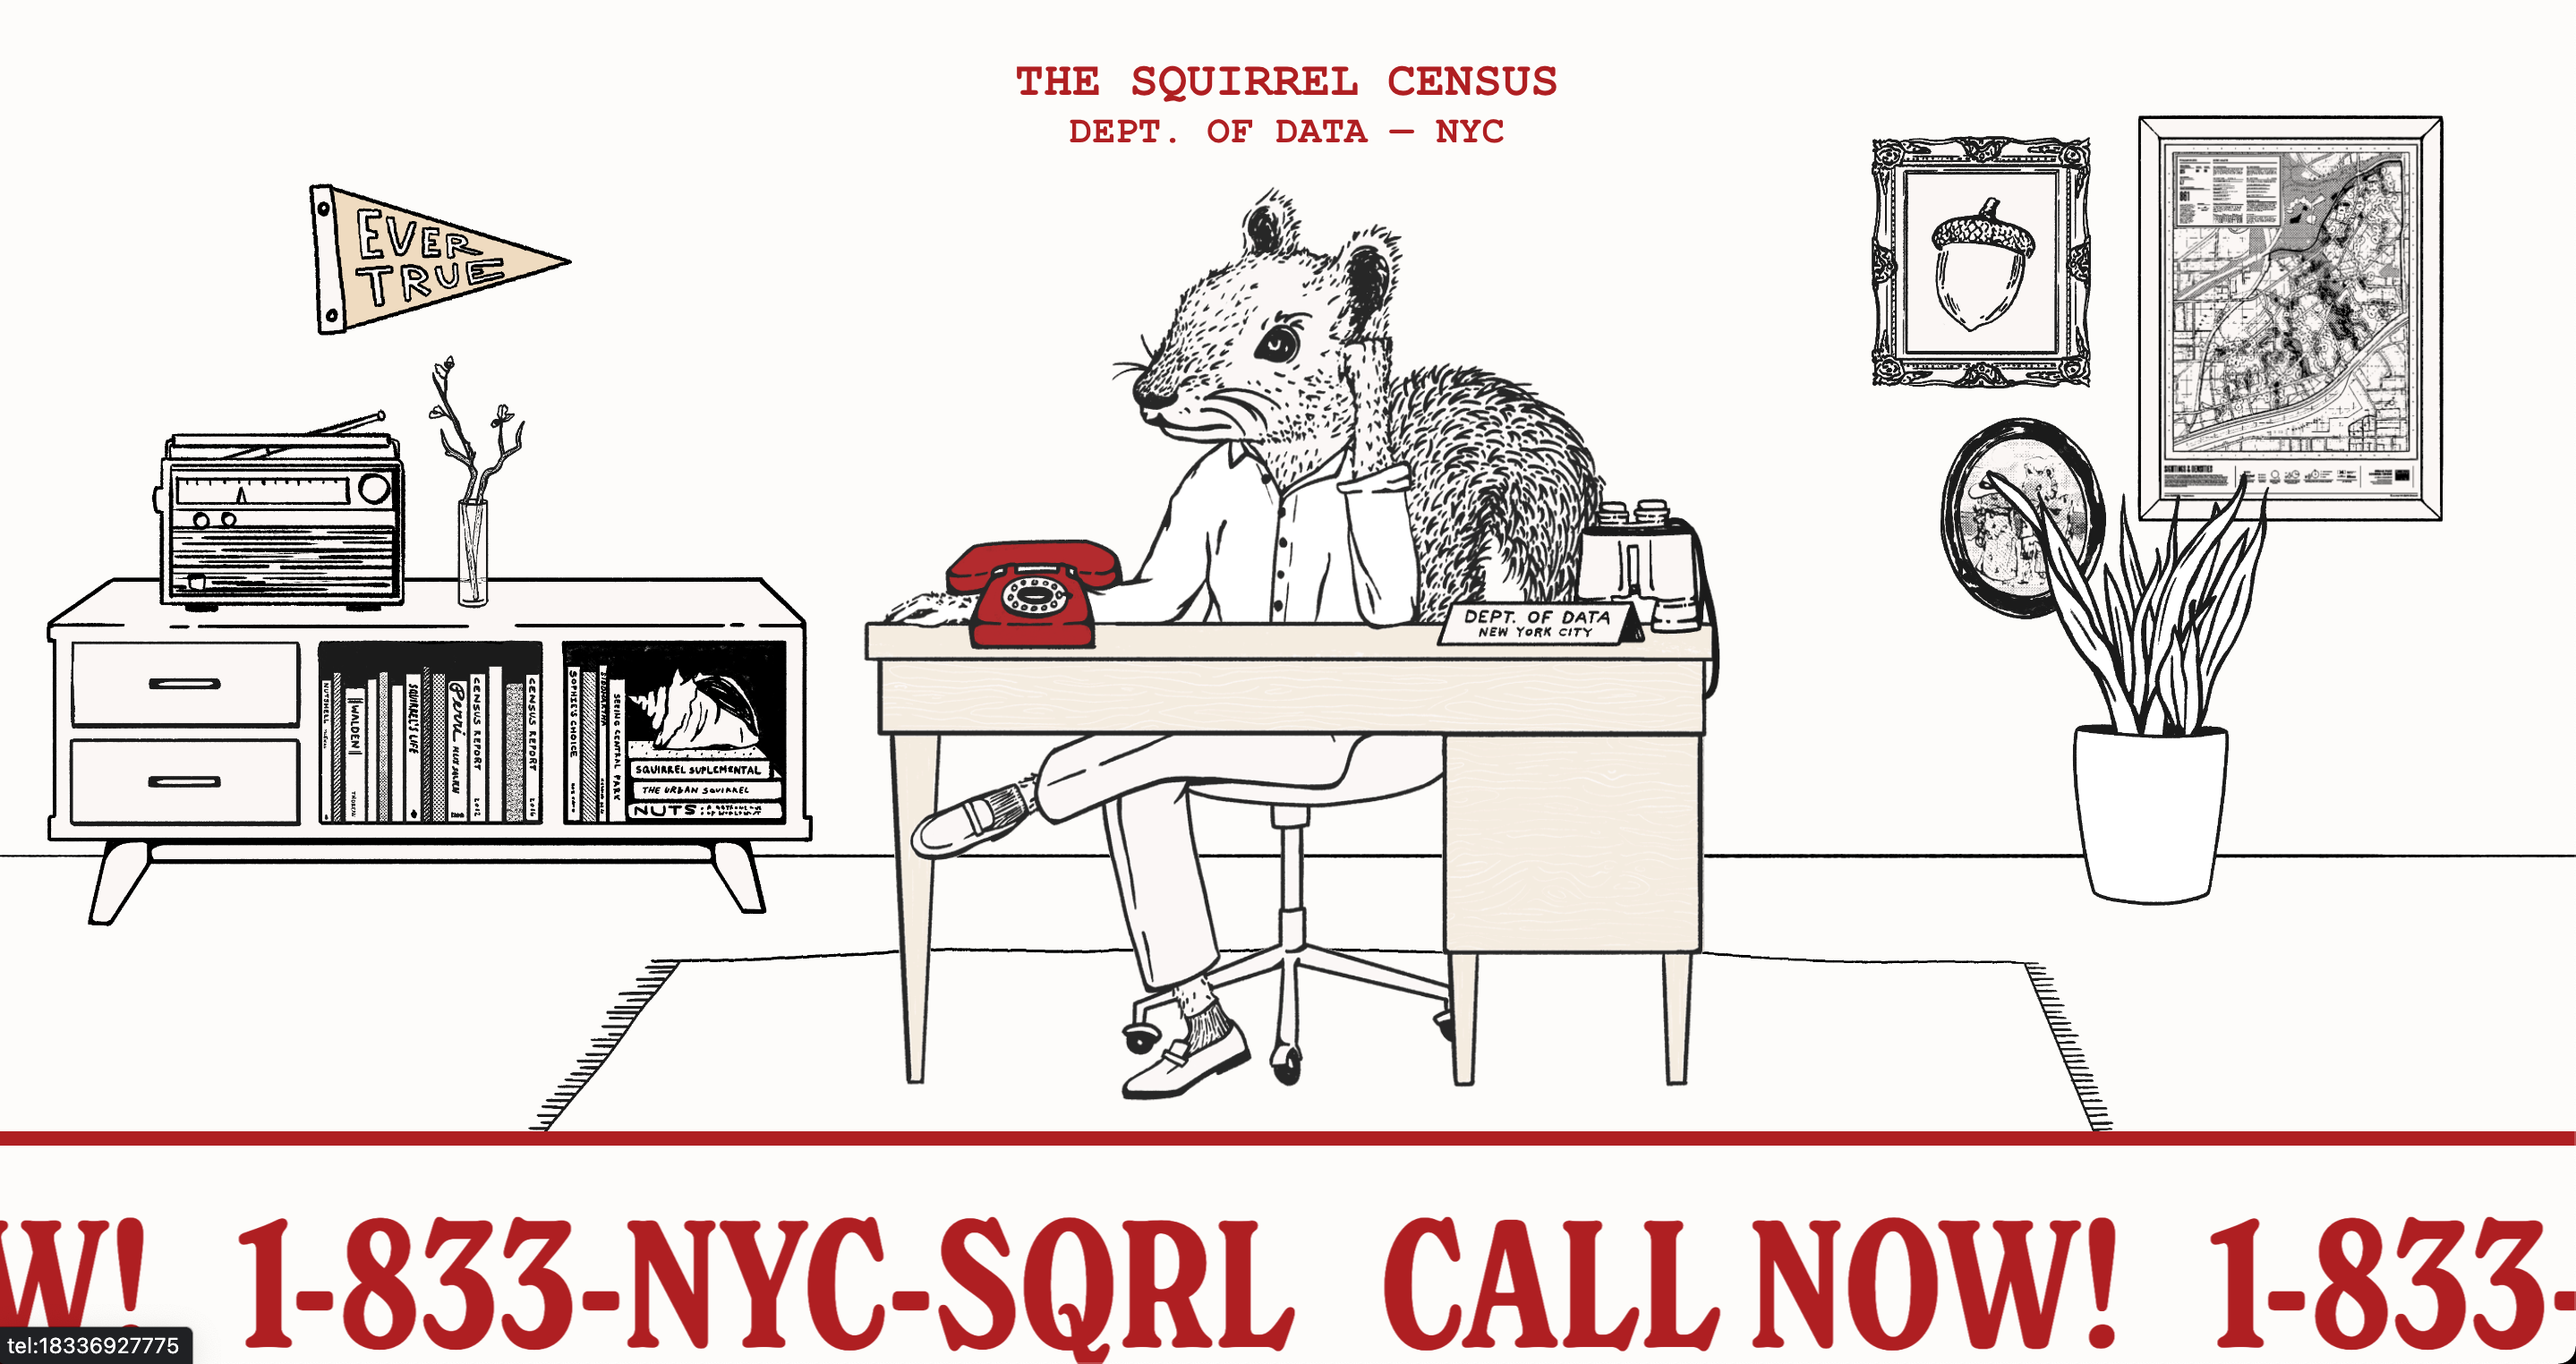

### Design Choices:
- First decided on the steps of my composition function for the analyze function
- Steps:
    - Data definitions (Primary Colour, Shift, and Squirrel Data)
    - Read function meant to read a given file and output a value that we can analyze
    - Analyze function (re-named to find_percent)
    - Main function which brings together both the read and analyze functions
    - Pie Chart function (pie_chart_for_squirrels)
        - choose a pie chart since I thought it would be the best way to show the data (as opposed to a line chart, or scatter plot)

#### Read Function

``` python

@typecheck
def read(filename: str) -> List[SquirrelData]:
    """    
    Reads information from the specified file and returns a list of squirrel data.
    """
    #return []  #stub
    # template based on HtDAP
    # losd contains the result so far
    losd = [] # type: List[SquirrelData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            if has_colour(row):
                sd = SquirrelData(parse_primary_colour(row[8]), parse_shift(row[4]))
                losd.append(sd)
    
    return losd

```

#### Analyze Function
In the end, I created six helper functions each with a specific purpose to help create the final function.

``` python

@typecheck
def find_percent(losd: List[SquirrelData], colour: PrimaryColour, time: Shift) -> float: 
    """ 
    Returns the percent of squirrels of the given colour that were seen a the given time. 
    If the list is empty, returns 0.0. 
    """ 

#     return 0 # stub
# template from List[SquirrelData] and two additional parameters (colour and time) # should ask about this
    # stores the number of squirrels that have the same colour and time as the given colour and time. 
    num_of_squirrels = 0  # type: int 
    
    for sd in losd: 
        if matches_colour(sd, colour) and matches_shift(sd, time):
            num_of_squirrels += 1
    total_coloured_squirrels = total_matches_colour(losd, colour)
    return final_percent(num_of_squirrels, total_coloured_squirrels)
```

#### Main Function
This function bring the analyze and read functions together to create a function that takes in a filename, colour, and time.

``` python

@typecheck
def main(filename: str, colour: PrimaryColour, time: Shift) -> float:
    """
    Reads the squirrel data from a given filename, and returns the percent of squirrels with the given colour
    seen at the given time (either True indicating AM or False indicating PM) 
    out of all the squirrels seen in the squirrel data. 
    """
    # Template from HtDAP, based on function composition 
    return find_percent(read(filename), colour, time) 

```

#### Pie Chart Function
This function changes the main function slightly to create a pie chart based off of the data. I choose a pie chart because I wanted to show the composition of squirrels seen in the morning versus at night and this was the best way to display the data. 


- Needed to create a function that would create a list of percents for the composition of the pie chart
- Was able to use my find_percent function (analyze function) and not have to rewrite functions

``` python

@typecheck
def pie_chart_for_squirrels(filename: str, colour: PrimaryColour) -> None:
    """
    Reads the squirrel data from a given filename, and returns a pie chart showing the percent of squirrels 
    with the given colour seen either at AM or PM.  
    """
    # Template from HtDAP, based on function composition 
    return show_pie_chart(list_of_percents(read(filename), colour))

``` 

### Problem Solving:
The visualization shows a pie chart that shows the composition of a given colour of squirrel (either gray, black, or cinnamon) seen in the morning or at night. 
- Solves the problem by compacting the large Squirrel Census dataset into an organized, readable visualization.

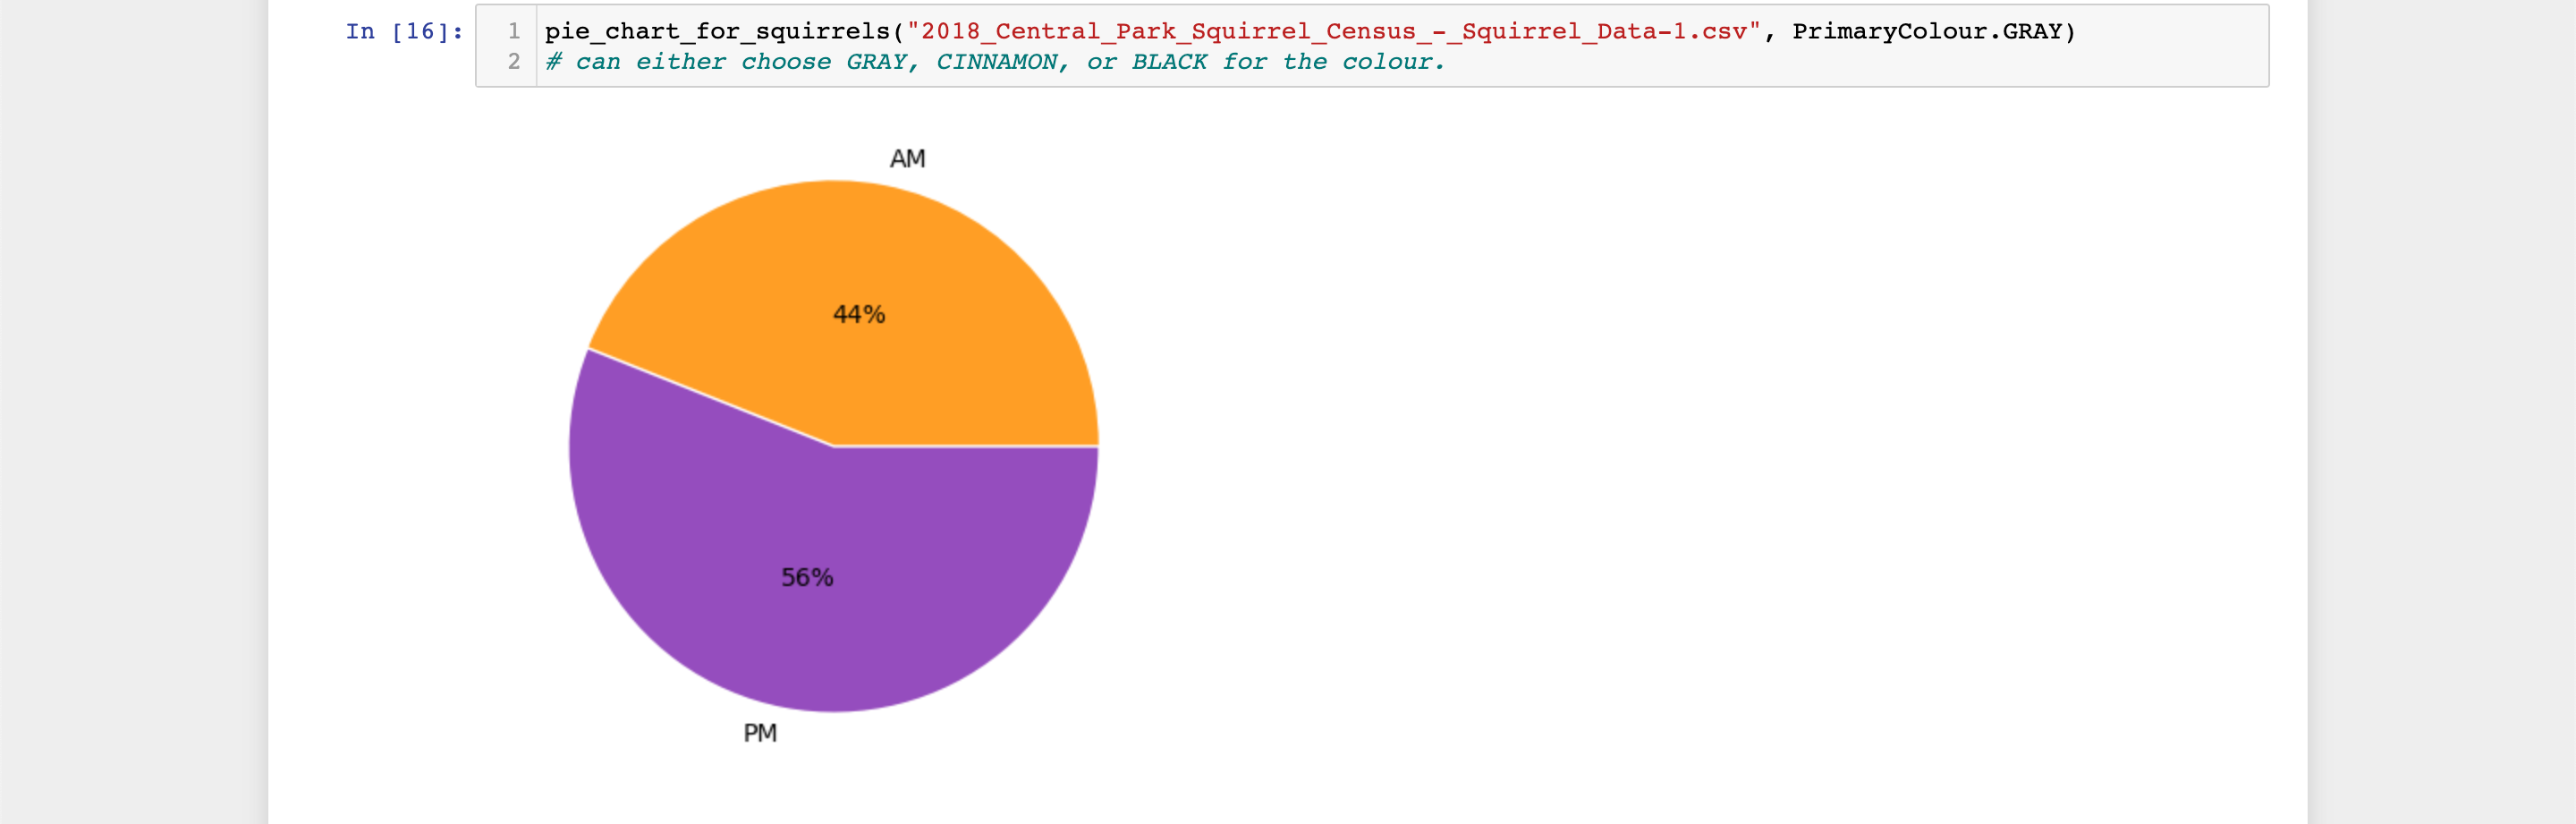

### Most Challenging:
- Figuring out what helper functions I needed
- Learning how to create a pie chart
- Lots of new coding functions to write (read, pie chart)

### Future Work:
- Know how to read a file, turn the file data into a workable list, and create functions to help answer my question

Alot of my code is reusable since many of the functions I wrote are basic functions that can be used in many different analyses. Some examples include:

#### Division Function:

``` python
@typecheck
def final_percent(n1: int, n2: int) -> float:
    """
    Returns n1 divided by n2 and then multiplied by 100 to return a percent rounded to two decimal places. 
    Gotta rember how to use round. 
    Assumes n2 cannot equal zero. 
    """
#     return 0.00 # stub
# template based on atomic non-distinct twice.
    if n2 == 0:
        return 0
    else:
        return n1/n2*100 
```

#### Parse Functions:

``` python

@typecheck
def parse_primary_colour(colour: str) -> PrimaryColour:
    """
    Returns a primary fur colour given a string which must be either "Gray", "Cinnamon", or "Black".
    Returns the corresponding PrimaryColour.
    """
#     return None # stub
# template based on atomic non-distinct
    if colour == "Gray":
        return PrimaryColour.GRAY
    if colour == "Cinnamon":
        return PrimaryColour.CINNAMON
    if colour == "Black":
        return PrimaryColour.BLACK


@typecheck
def parse_shift(shift: str) -> Shift:
    """
    Returns a shift given a string which must be either "AM" or "PM" 
    and returns True if the squirrel was seen in AM and 
    False if the squirrel was seen in PM.
    """
#     return True # stub
# template based on atomic non-distinct
    if shift == "AM":
        return True
    elif shift == "PM":
        return False
    
```

#### Read Function:
- can be easily changed to read different data from the dataset

``` python

@typecheck
def read(filename: str) -> List[SquirrelData]:
    """    
    Reads information from the specified file and returns a list of squirrel data.
    """
    #return []  #stub
    # template based on HtDAP
    # losd contains the result so far
    losd = [] # type: List[SquirrelData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            if has_colour(row):
                sd = SquirrelData(parse_primary_colour(row[8]), parse_shift(row[4]))
                losd.append(sd)
    
    return losd

```

### 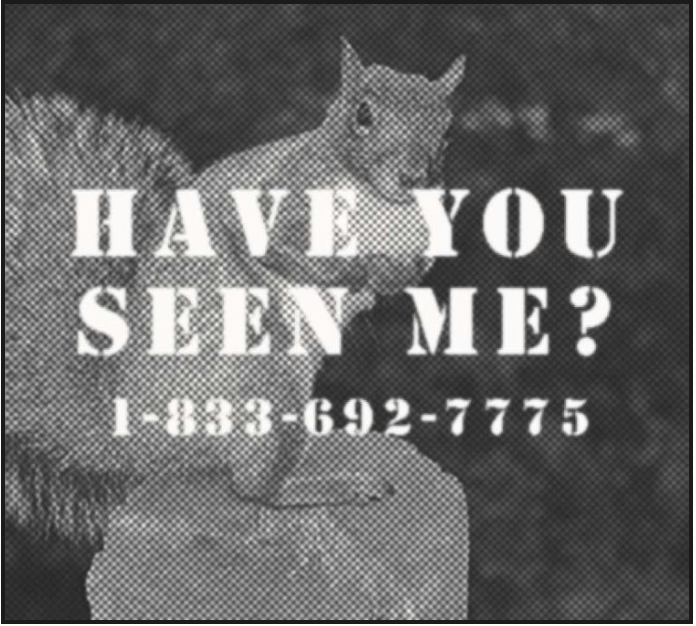